In [1]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


%matplotlib inline


Using TensorFlow backend.


In [2]:
#To create variables for which the the paths to the train, valid, and test data directories are assigned.

train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [3]:
# To use the Keras ImageDataGenerator class to create batches of data from the train, valid, and test directories.

train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(256,256),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)


valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(256,256),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)


test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(256,256),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)




Found 7500 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


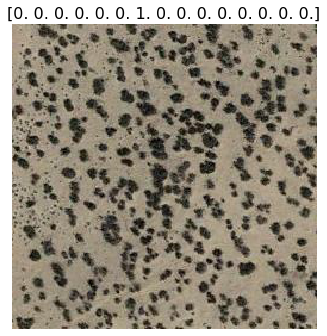

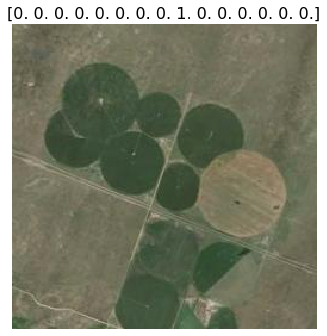

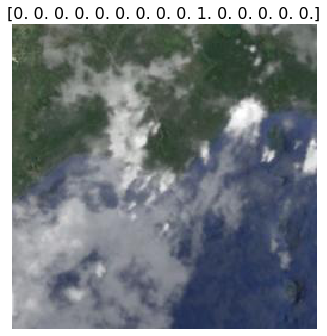

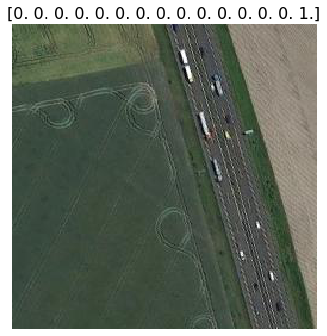

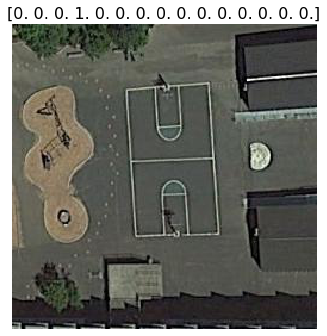

In [30]:
# To plot first 5 images in the training dataset alongside with their label
def get5Images(selected_image, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(selected_image[0]) is np.ndarray:
        selected_image = np.array(selected_image).astype(np.uint8)
        if (selected_image.shape[-1] != 3):
            selected_image = selected_image.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(selected_image)//rows if len(selected_image) % 2 == 0 else len(selected_image)//rows + 1
    for i in range(len(selected_image)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(selected_image[i], interpolation=None if interp else 'none')
for idx in range(0,5):
    image, label = train_batches[idx]
    get5Images(image, titles=label)